In [169]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import jieba
from collections import Counter

In [170]:
url = 'https://www.cakeresume.com/jobs?location_list%5B0%5D=Taiwan'  # cakeresume找工作
response = requests.get(url)

In [171]:
if response.status_code == 200:
  soup = BeautifulSoup(response.text, 'html.parser')

In [172]:
response.status_code

200

In [173]:
#創建一個空的列表，用來暫存工作資料
job_data_list = []

def get_job_data(page_number):
    url = f"https://www.cakeresume.com/jobs?location_list%5B0%5D=Taiwan&page={page_number}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # 在這裡解析網頁資料，提取你需要的內容
        # 例如，如果你要找到所有工作的標題，可以使用下面的程式碼：
        job_info = soup.find_all('div', class_='JobSearchItem_headerTitle__CuE3V')
        for job in job_info:
            job_title = job.text.strip()  
            job_data_list.append(job_title)  # 將工作資料加入列表中
            print(job.text)

    else:
        print(f"Failed to retrieve page {page_number}.")

# 要獲取的頁數範圍
start_page = 1
end_page = 1  

for page_number in range(start_page, end_page + 1):
    print(f"\n 工作內容 from page {page_number}...")
    get_job_data(page_number)


 工作內容 from page 1...
特力集團 2024 Green Program招募計畫 (5/12 投遞截止)
🪐2024 信義房屋經營管理儲備幹部(MA)🪐4/30截止收件
2024 WorldQuant IQC 全球量化金融研究錦標賽
【10.9 萬實作獎勵金，不限年齡經驗】 2024 T 大使計畫｜第二梯次開跑！延長報名至 05/24 截止
特力集團 2024 Green Program-設計類 招募計畫 (5/12 投遞截止)
【亞馬遜Amazon】電商專案管理師 Amazon Project Manager
電商資料分析
@cosme 【Beauty x IT 影響力人才計畫】 儲備幹部(MA)招募 2024
【@cosme】美妝平台/社群經營企劃
【518熊班】產品設計師 Product Designer


In [174]:
#創建一個空的列表，用來暫存薪資資料
salary_data_list = []

def get_job_data(page_number):
    url = f"https://www.cakeresume.com/jobs?location_list%5B0%5D=Taiwan&page={page_number}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # 在這裡解析網頁資料，提取你需要的內容
        # 例如，如果你要找到所有工作的標題，可以使用下面的程式碼：
        salary_info = soup.find_all('div', class_='InlineMessage_label__LJGjW')
        for salary in salary_info:
            salary_info = re.findall(r'NT| \b\d{3,} |\d+[萬|]', salary.text)
            salary_text = salary.text.strip()
            if salary_info:
                print(salary.text)
                salary_data_list.append(salary.text)
    else:
        print(f"Failed to retrieve page {page_number}.")

# 要獲取的頁數範圍
start_page = 1
end_page = 1  

for page_number in range(start_page, end_page + 1):
    print(f"\n 薪資 from page {page_number}...")
    get_job_data(page_number)


 薪資 from page 1...
4.2萬 ~ 5.2萬 TWD / 月
120萬 ~ 150萬 TWD / 年
1000 ~ 2萬 USD / 按件計酬
10.9萬 ~ 10.9萬 TWD / 按件計酬
4.2萬 ~ 5.2萬 TWD / 月
5萬 ~ 6萬 TWD / 月
5萬 ~ 6萬 TWD / 月
4.5萬 ~ 5.5萬 TWD / 月
3.5萬 ~ 5萬 TWD / 月
5萬 ~ 5.5萬 TWD / 月


In [175]:
#創建一個空的列表，用來暫存工作介紹
job_data_description = []

def get_job_data(page_number):
    url = f"https://www.cakeresume.com/jobs?location_list%5B0%5D=Taiwan&page={page_number}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # 在這裡解析網頁資料，提取你需要的內容
        # 例如，如果你要找到所有工作的標題，可以使用下面的程式碼：
        job_info = soup.find_all('div', class_='JobSearchItem_description__si5zg')
        for job in job_info:
            job_title = job.text.strip()  
            job_data_description.append(job_title)  # 將工作資料加入列表中
            print(job.text)

    else:
        print(f"Failed to retrieve page {page_number}.")

# 要獲取的頁數範圍
start_page = 1
end_page = 1  

for page_number in range(start_page, end_page + 1):
    print(f"\n 工作內容 from page {page_number}...")
    get_job_data(page_number)


 工作內容 from page 1...
特力集團為社會新鮮人量身打造的「GREEN PROGRAM」，透過完整的學習發展藍圖，扎實的工作歷練與任務挑戰，深耕零售產業。帶領你實踐創意、邁向卓越，成為具備國際視野的全方位專業人才 。 ★IDP 2.5年的專
信義房屋希望居住在這片土地上的人們，在「不動產交易買賣」與「居住生活日常」方面有更好的保障與體驗！期待你與信義房屋 一起，加速這個改變🚀 【 信義房屋 ｜經營管理儲備幹部 🏠】Light Up Your Future！ 信義企
準備好成為下一個量化金融研究贏家了嗎？ 報名將於 5 月 15 日截止！ 探索量化金融的世界並參與由 WorldQuant BRAIN 所舉辦的 2024 International Quant Championship (全球量化金融研究錦標賽) — 我們的旗艦型競賽，取得代表您所在國家/
因應數位經濟與 AI 興起，政府推動「數位青年 T 大使推動計畫」，針對未來所需人才提前布局，同步發展創新商業模式與技術，達到擴大市場與帶動青年薪資成長之目標，透過職能培育與企業實作，協
特力集團為社會新鮮人量身打造的「GREEN PROGRAM」，透過完整的學習發展藍圖，扎實的工作歷練與任務挑戰，深耕零售產業。帶領你實踐創意、邁向卓越，成為具備國際視野的全方位專業人才 。 ★IDP 2.5年的專
【Hour Loop 飛輪電商】在2013年成立，並於2022年初在美國那斯達克上市。作為亞馬遜 (Amazon) 第三方賣家，我們的工作不只廠商開發，還包括商品上架、價格制定，以及物流與庫存管理，通通一手包辦。 在百萬競爭對
【Hour Loop 飛輪電商】在2013年成立，並於2022年初在美國那斯達克上市。作為亞馬遜 (Amazon) 第三方賣家，我們的工作不只廠商開發，還包括商品上架、價格制定，以及物流與庫存管理，通通一手包辦。 在百萬競爭對
i-TRUE運營20年來，身為「日本NO.1美妝口碑網站＠cosme」所屬日本東證一部上市公司istyle Inc.集團的台灣子公司，全心致力於「Beauty × IT」美妝產業知識共創。 <Beauty> i-TRUE 艾思網絡主要是經營@cosme Taiwan(前身UrCosme,2004年創
@cosme Taiwan(前身UrCosme,2004年創

In [176]:
job_data_description_keywords = []
def tokenize(text):
    # 使用精確模式分詞
    words = jieba.cut(text, cut_all=False)
    # 返回分詞結果
    return list(words)

def extract_keywords(tokens):
    # 過濾空白字符
    tokens = [token for token in tokens if token.strip()]
    # 使用 Counter 統計詞頻
    word_counts = Counter(tokens)
    # 提取前十個詞頻最高的詞
    top_keywords = word_counts.most_common(10)
    # 返回前十個關鍵字
    return [keyword[0] for keyword in top_keywords]
   
    # 遍歷列表並分詞
for job_data in job_data_description:
    # 清理工作介紹文本，只保留中文、英文和數字
    cleaned_description = clean_text(job_data)
    # 分詞
    tokens = tokenize(cleaned_description)
    # 提取關鍵字
    keywords = extract_keywords(tokens)
    # 輸出關鍵字
    print(keywords)
    
    job_data_description_keywords.append(' '.join(keywords))


['的', '特力', '集團', '為', '社會', '新鮮人', '量身', '打造', 'GREEN', 'PROGRAM']
['信義', '房屋', '與', '居住', '在', '的', '希望', '這片', '土地', '上']
['量化', '金融', '的', '研究', '準備', '好', '成為', '下', '一個', '贏家']
['與', '數位', '推動', '青年', '因應', '經濟', 'AI', '興起', '政府', 'T']
['的', '特力', '集團', '為', '社會', '新鮮人', '量身', '打造', 'GREEN', 'PROGRAM']
['在', 'Hour', 'Loop', '飛輪', '電商', '2013', '年', '成立', '並', '於']
['在', 'Hour', 'Loop', '飛輪', '電商', '2013', '年', '成立', '並', '於']
['i', '-', 'TRUE', '日本', 'cosme', 'Beauty', '運營', '20', '年來', '身為']
['cosme', '年', '在', '日本', 'Taiwan', '前身', 'UrCosme', '2004', '創建', '台']
['518', '科技', '熊班', '的', '發音', '數字', '旗下', '站台', '是', '人力']


In [177]:
if len(job_data_list) == len(salary_data_list) ==len(job_data_description) ==len(job_data_description_keywords):
    # 使用 zip() 函數將四個列表合併
    combined_data = list(zip(job_data_list, salary_data_list, job_data_description, job_data_description_keywords))
    
    # 創建 DataFrame，並指定欄位名稱
    df = pd.DataFrame(combined_data, columns=['工作', '薪資', '介紹', '關鍵詞'])
    
    # 顯示 DataFrame
    print(df.head())
else:
    print("Error: 四個列表的長度不同，無法合併。")

                                                  工作  \
0            特力集團 2024 Green Program招募計畫 (5/12 投遞截止)   
1                    🪐2024 信義房屋經營管理儲備幹部(MA)🪐4/30截止收件   
2                    2024 WorldQuant IQC 全球量化金融研究錦標賽   
3  【10.9 萬實作獎勵金，不限年齡經驗】 2024 T 大使計畫｜第二梯次開跑！延長報名至 ...   
4       特力集團 2024 Green Program-設計類 招募計畫 (5/12 投遞截止)   

                         薪資  \
0       4.2萬 ~ 5.2萬 TWD / 月   
1       120萬 ~ 150萬 TWD / 年   
2      1000 ~ 2萬 USD / 按件計酬   
3  10.9萬 ~ 10.9萬 TWD / 按件計酬   
4       4.2萬 ~ 5.2萬 TWD / 月   

                                                  介紹  \
0  特力集團為社會新鮮人量身打造的「GREEN PROGRAM」，透過完整的學習發展藍圖，扎實的...   
1  信義房屋希望居住在這片土地上的人們，在「不動產交易買賣」與「居住生活日常」方面有更好的保障與...   
2  準備好成為下一個量化金融研究贏家了嗎？ 報名將於 5 月 15 日截止！ 探索量化金融的世界...   
3  因應數位經濟與 AI 興起，政府推動「數位青年 T 大使推動計畫」，針對未來所需人才提前布局...   
4  特力集團為社會新鮮人量身打造的「GREEN PROGRAM」，透過完整的學習發展藍圖，扎實的...   

                                    關鍵詞  
0  的 特力 集團 為 社會 新鮮人 量身 打造 GREEN PROGRAM  
1             信義 房屋 與 居住 在 的 希望 這片 土地 上  
2            

In [178]:
df

,工作,薪資,介紹,關鍵詞
0,特力集團 2024 Green Program招募計畫 (5/12 投遞截止),4.2萬 ~ 5.2萬 TWD / 月,特力集團為社會新鮮人量身打造的「GREEN PROGRAM」，透過完整的學習發展藍圖，扎實的...,的 特力 集團 為 社會 新鮮人 量身 打造 GREEN PROGRAM
1,🪐2024 信義房屋經營管理儲備幹部(MA)🪐4/30截止收件,120萬 ~ 150萬 TWD / 年,信義房屋希望居住在這片土地上的人們，在「不動產交易買賣」與「居住生活日常」方面有更好的保障與...,信義 房屋 與 居住 在 的 希望 這片 土地 上
2,2024 WorldQuant IQC 全球量化金融研究錦標賽,1000 ~ 2萬 USD / 按件計酬,準備好成為下一個量化金融研究贏家了嗎？ 報名將於 5 月 15 日截止！ 探索量化金融的世界...,量化 金融 的 研究 準備 好 成為 下 一個 贏家
3,【10.9 萬實作獎勵金，不限年齡經驗】 2024 T 大使計畫｜第二梯次開跑！延長報名至 ...,10.9萬 ~ 10.9萬 TWD / 按件計酬,因應數位經濟與 AI 興起，政府推動「數位青年 T 大使推動計畫」，針對未來所需人才提前布局...,與 數位 推動 青年 因應 經濟 AI 興起 政府 T
4,特力集團 2024 Green Program-設計類 招募計畫 (5/12 投遞截止),4.2萬 ~ 5.2萬 TWD / 月,特力集團為社會新鮮人量身打造的「GREEN PROGRAM」，透過完整的學習發展藍圖，扎實的...,的 特力 集團 為 社會 新鮮人 量身 打造 GREEN PROGRAM
5,【亞馬遜Amazon】電商專案管理師 Amazon Project Manager,5萬 ~ 6萬 TWD / 月,【Hour Loop 飛輪電商】在2013年成立，並於2022年初在美國那斯達克上市。作為亞...,在 Hour Loop 飛輪 電商 2013 年 成立 並 於
6,電商資料分析,5萬 ~ 6萬 TWD / 月,【Hour Loop 飛輪電商】在2013年成立，並於2022年初在美國那斯達克上市。作為亞...,在 Hour Loop 飛輪 電商 2013 年 成立 並 於
7,@cosme 【Beauty x IT 影響力人才計畫】 儲備幹部(MA)招募 2024,4.5萬 ~ 5.5萬 TWD / 月,i-TRUE運營20年來，身為「日本NO.1美妝口碑網站＠cosme」所屬日本東證一部上市公...,i - TRUE 日本 cosme Beauty 運營 20 年來 身為
8,【@cosme】美妝平台/社群經營企劃,3.5萬 ~ 5萬 TWD / 月,"@cosme Taiwan(前身UrCosme,2004年創建)在台營運20年，為國內消費者...",cosme 年 在 日本 Taiwan 前身 UrCosme 2004 創建 台
9,【518熊班】產品設計師 Product Designer,5萬 ~ 5.5萬 TWD / 月,數字科技旗下站台 –「518熊班」是518人力銀行在 2020 年 11 月正式蛻變為「51...,518 科技 熊班 的 發音 數字 旗下 站台 是 人力


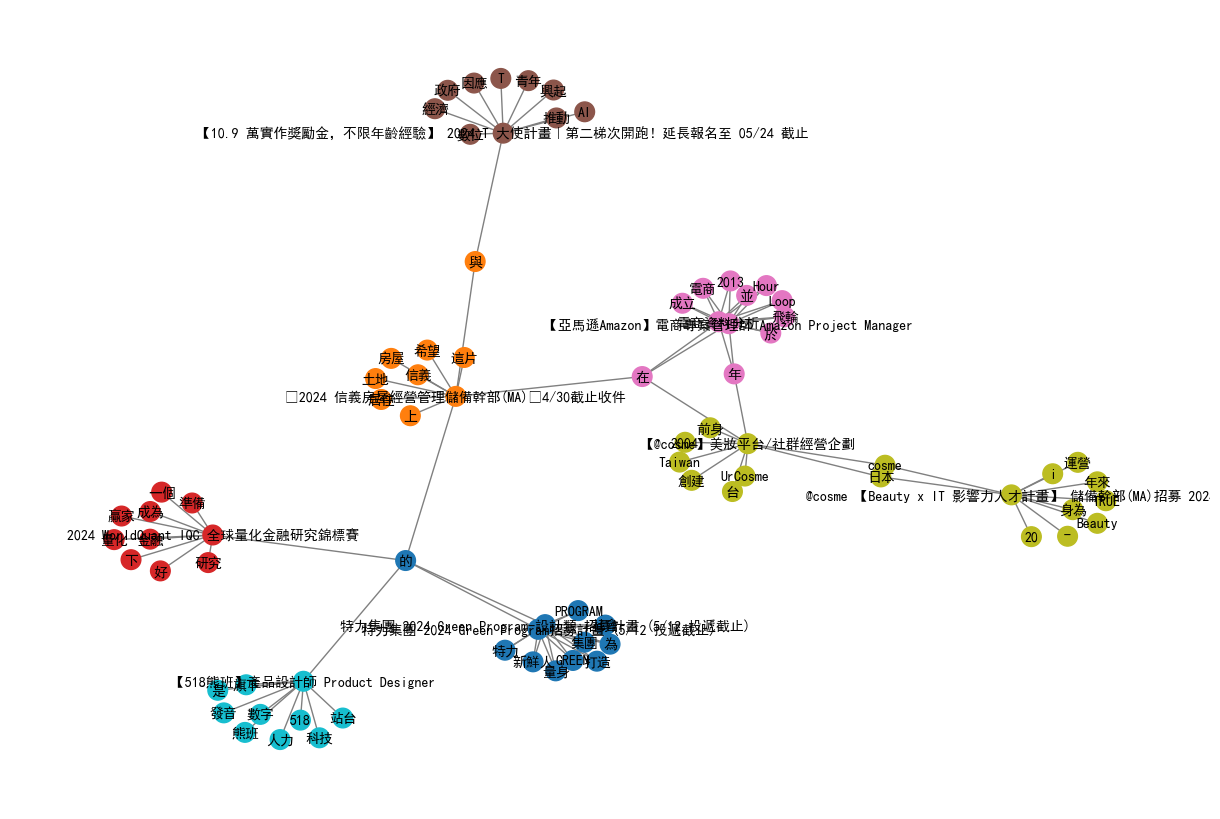

In [187]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain

# 設定字體
plt.rcParams['font.sans-serif'] = ['SimHei']

# 創建空的無量圖
G = nx.Graph()

# 增加工作節點
for job_data in job_data_list:
    G.add_node(job_data)

# 添加工作與關鍵詞之間的關係
for job_data, keywords in zip(job_data_list, job_data_description_keywords):
    for keyword in keywords.split():
        G.add_node(keyword)
        G.add_edge(job_data, keyword)

# 使用 Louvain 社群檢測演算法找出社群結構
partition = community_louvain.best_partition(G)

# 繪製關聯圖
plt.figure(figsize=(12, 8))

# 定義節點顏色
node_colors = [partition[node] for node in G.nodes()]

# 繪製圖形
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, cmap=plt.cm.tab10, font_size=10, font_weight='bold', edge_color='gray')

# 顯示關聯圖
plt.show()